In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

# View all of the classes that automap found
base.classes.keys()

# Save references to each table
measure = base.classes.measurement
station = base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [54]:
# Find the most recent date in the data set.
recent_date = session.query(measure.date).order_by(measure.date.desc()).first()[0]

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Calculate the date one year from the last date in data set.
one_year_ago = (dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')

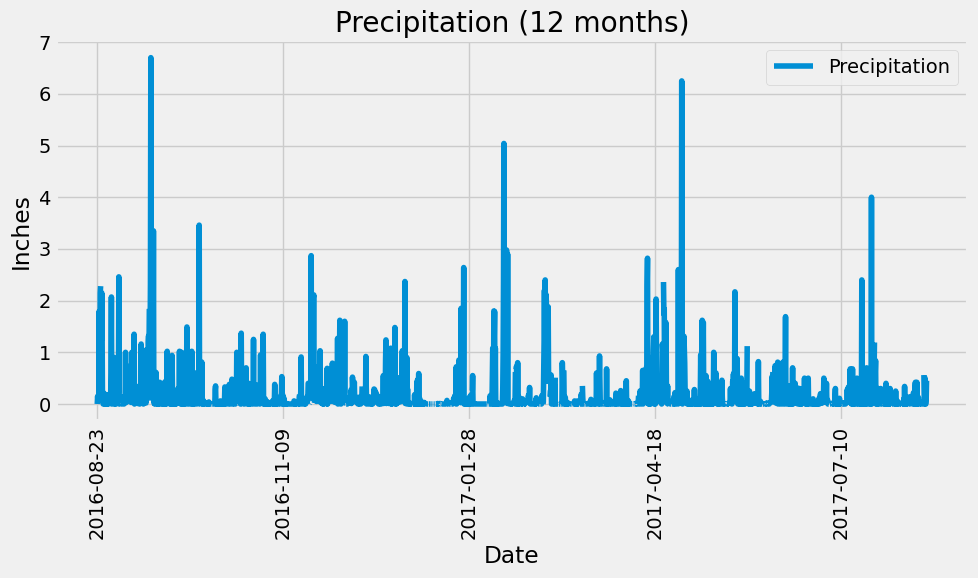

In [71]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measure.date, measure.prcp).\
            filter(measure.date >= one_year_ago).\
            order_by(measure.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df.set_index('Date', inplace=True)
precip_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize=(10,6), rot=90)
plt.title("Precipitation (12 months)")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"], loc="best")
plt.tight_layout()
plt.show()

In [72]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [78]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(station.station)).scalar()
num_stations

9

In [81]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measure.station, func.count(measure.station)).\
                    group_by(measure.station).\
                    order_by(func.count(measure.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs)).\
                filter(measure.station == most_active_station).all()

print(f'Lowest temperature for {most_active_station}: {temps[0][0]} degrees F.')
print(f'Highest temperature for {most_active_station}: {temps[0][1]} degrees F.')
print(f'Average temperature for {most_active_station}: {temps[0][2]} degrees F.')


Lowest temperature for USC00519281: 54.0 degrees F.
Highest temperature for USC00519281: 85.0 degrees F.
Average temperature for USC00519281: 71.66378066378067 degrees F.


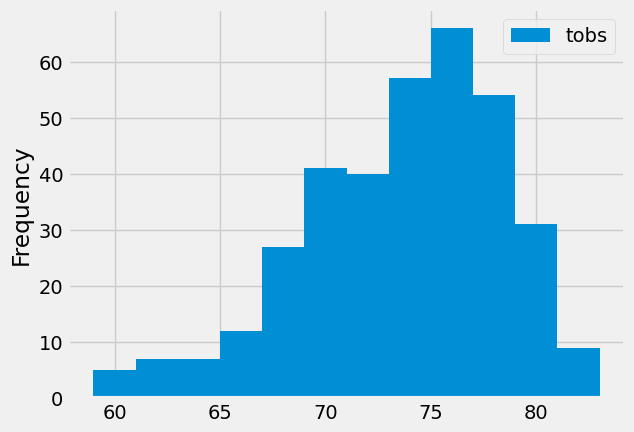

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_date = session.query(measure.date).\
                filter(measure.station == most_active_station).\
                order_by(measure.date.desc()).first()[0]

one_year_ago = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

results = session.query(measure.tobs).\
            filter(measure.station == most_active_station).\
            filter(measure.date >= one_year_ago).all()

results_df = pd.DataFrame(results, columns=['tobs'])

plt.hist(results_df['tobs'], bins=12, label='tobs')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()